# Laboratorio 1: MovieAlpes

- Juan Camilo Colmenares - 202011866
- Juan Montealegre - 20201723
- David Gonzales - 201815834

El objetivo de este laboratorio es realizar para MovieAlpes todo el proceso de carectización e identificación de patrones que puedan ser utilizados para entender las preferencias de sus usuarios e identificar los atributos que influyen en las calificaciones positivas. El objetivo final es mejorar la experiencia de los usuarios proporcionando recomendaciones más relevantes y personalizadas a los gustos de ellos. La solución a este problema será basada en una tarea de agrupación

In [354]:
!pip install scikit-learn-extra

You should consider upgrading via the 'c:\users\juank\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [355]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

In [356]:
df = pd.read_csv('./data/data.csv', sep=';')

## 1. Entendimiento de los datos

En esta etapa es importante saber si los datos son o no suficientes para el alcance del proyecto y, en caso de serlo, entender bien sus características para poder definir el camino de limpieza y preparación para lograr el objetivo del proyecto.
En particular, es importante realizar un perfilamiento completo que incluya lo descrito en el manterial del curso -ver infografía de entendimiento de datos-, donde se incluye estadística descriptiva y gráficos sobre los datos, señalando sus principales estadísticos: media, varianza, desviación estándar, etc., para el caso de las columnas numéricas. En caso de datos categóricos recuerde que es importante conocer las categorías y en qué proporción se presentan. Tener en cuenta que una parte fundamental de esta etapa está relacionada con el análisis a nivel de calidad de datos y, en particular, a nivel de las dimensiones de calidad (completitud, unicidad, consistencia, validez) para identificar las actividades de preparación que requieren los datos.

### 1.1 Perfilamiento de datos

In [357]:
df.shape

(7471, 18)

In [358]:
df.head()

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
0,1,1,tt0103064,movie,Terminator 2: Judgment Day,0.0,1991.0,137,8.6,1128166.0,17.0,US,en,dvd,\N,0.0,Action,Sci-Fi
1,10,17,tt0231050,tvSeries,ToransufÃ´mÃ¢: KÃ¢robotto,0.0,2000.0,22,6.6,577.0,16.0,US,en,alternative,\N,0.0,Action,Adventure
2,13,23,tt0253474,movie,The Pianist,0.0,2002.0,150,8.5,860569.0,7.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
3,21,55,tt0369339,movie,Collateral,0.0,2004.0,120,7.5,417391.0,6.0,US,en,imdbDisplay,\N,0.0,Action,Crime
4,28,87,tt0439547,movie,2 Filhos de Francisco: A HistÃ³ria de ZezÃ© di...,0.0,2005.0,132,6.9,5946.0,5.0,US,en,imdbDisplay,\N,0.0,Biography,Drama


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                7471 non-null   int64  
 1   index            7471 non-null   int64  
 2   tconst           7471 non-null   object 
 3   titleType        7471 non-null   object 
 4   originalTitle    7471 non-null   object 
 5   isAdult          7470 non-null   float64
 6   startYear        7470 non-null   float64
 7   runtimeMinutes   7470 non-null   object 
 8   averageRating    7470 non-null   float64
 9   numVotes         7470 non-null   float64
 10  ordering         7470 non-null   float64
 11  region           7470 non-null   object 
 12  language         7470 non-null   object 
 13  types            7470 non-null   object 
 14  attributes       7470 non-null   object 
 15  isOriginalTitle  7470 non-null   float64
 16  main_genre       7470 non-null   object 
 17  secondary_genr

In [360]:
df.describe()

,#,index,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7471.000000,7471.000000,7470.0,7470.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,4043.482666,5440.458439,0.0,2013.157296,7.475676,7.282830e+04,16.567604,0.0
std,2192.753689,2752.820924,0.0,6.979151,2.771444,1.640233e+05,12.761147,0.0
min,1.000000,1.000000,0.0,1990.000000,6.500000,1.000000e+01,1.000000,0.0
25%,2152.500000,3073.500000,0.0,2008.000000,6.900000,6.265250e+03,6.000000,0.0
50%,4033.000000,5421.000000,0.0,2015.000000,7.300000,1.527900e+04,14.000000,0.0
75%,5914.500000,7641.500000,0.0,2019.000000,7.800000,5.641975e+04,24.000000,0.0
max,7849.000000,10274.000000,0.0,2023.000000,92.000000,2.197234e+06,119.000000,0.0


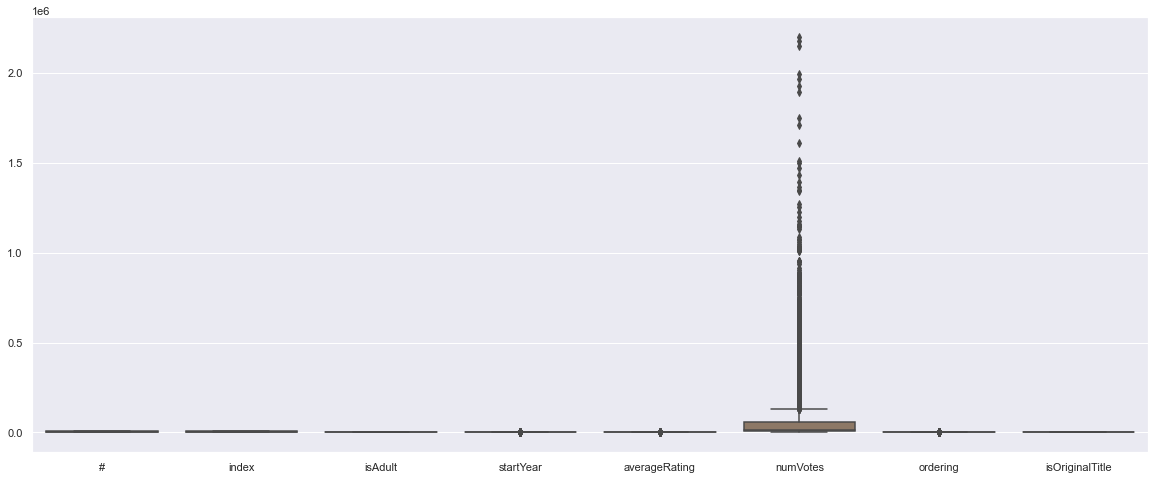

In [361]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="v")

A continuación esetudiaremos los datos separandolos entre datos númericos y categoricos

In [362]:
cols_float = df.select_dtypes(include = ['float']).columns
cols_int = df.select_dtypes(include = ['int64']).columns
print(cols_float, cols_int)

Index(['isAdult', 'startYear', 'averageRating', 'numVotes', 'ordering',
       'isOriginalTitle'],
      dtype='object') Index(['#', 'index'], dtype='object')


Al comparar el diccionario que se nos dio para validar que el tipo de dato se cumple hallamos que hay datos que aparecen como númericos pero en realidad deberían ser datos categoricos. Este es el caso de `isAdult` y `isOriginalTitle`, otra cosa a tener en cuenta de por qué este error ocurre es que por más que aparezca que son variables categoricas, el diccionario les pone un rango númerico


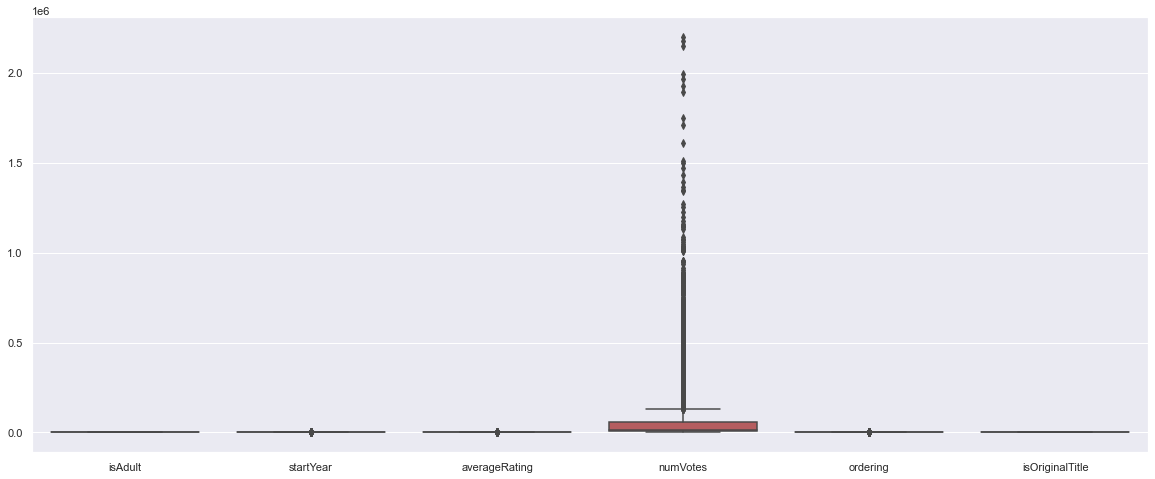

In [363]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df[cols_float], orient="v")

In [364]:
#El dato que más llamá la atención respecto a su distribución es numVotes ya que esta es altamente dispersa,
#por eso entramos a ver que esta pasando más a detalle
df[cols_float].describe()

,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7470.0,7470.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,0.0,2013.157296,7.475676,7.282830e+04,16.567604,0.0
std,0.0,6.979151,2.771444,1.640233e+05,12.761147,0.0
min,0.0,1990.000000,6.500000,1.000000e+01,1.000000,0.0
25%,0.0,2008.000000,6.900000,6.265250e+03,6.000000,0.0
50%,0.0,2015.000000,7.300000,1.527900e+04,14.000000,0.0
75%,0.0,2019.000000,7.800000,5.641975e+04,24.000000,0.0
max,0.0,2023.000000,92.000000,2.197234e+06,119.000000,0.0


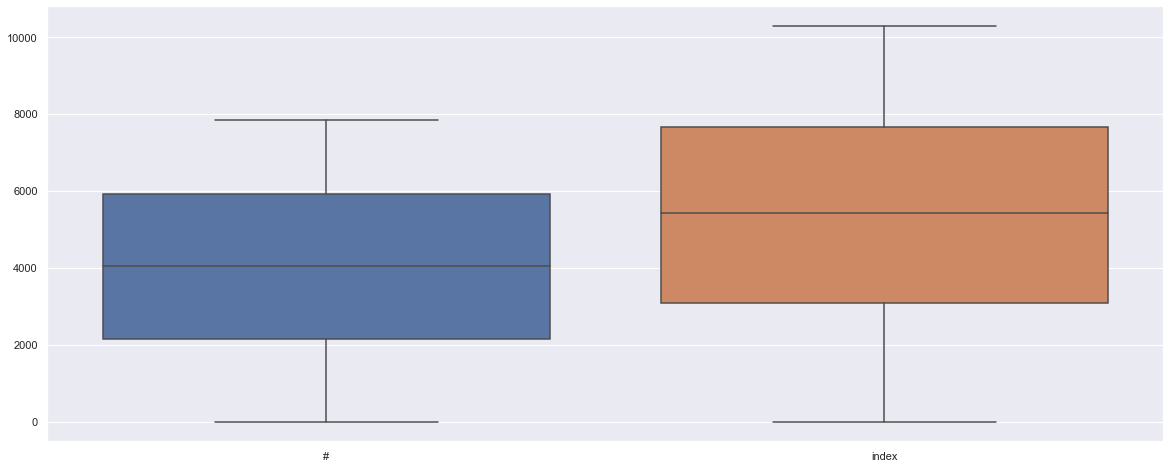

In [365]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df[cols_int], orient="v")

In [366]:
cols_non_number = df.select_dtypes(include = ['object']).columns
cols_non_number

Index(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region',
       'language', 'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')

Cabe mencionar que al comparar el diccionario que se nos dio vemos que hay datos que aparecen como categoricos pero en realidad deberían ser datos númericos. Este es el caso de `tconst` y `runtimeMinutes`


In [367]:
df[cols_non_number].describe()


,tconst,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
count,7471,7471,7471,7470,7470,7470,7470,7470,7470,7470
unique,7466,7,7290,362,4,1,5,1,22,26
top,tt0395843,movie,Home,60,IN,en,imdbDisplay,\N,Drama,Drama
freq,2,4673,3,534,5590,7470,7395,7470,1767,2428


Aquí toca hablar de lo que implica que el valor sea uno, que pues en realidad siginifca que toca eliminar la columna

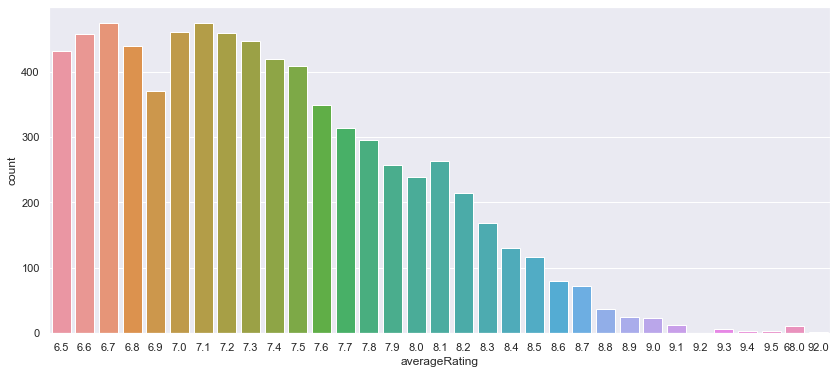

In [368]:
plt.figure(figsize=(14, 6))
sns.countplot(x='averageRating', data=df)
plt.show()

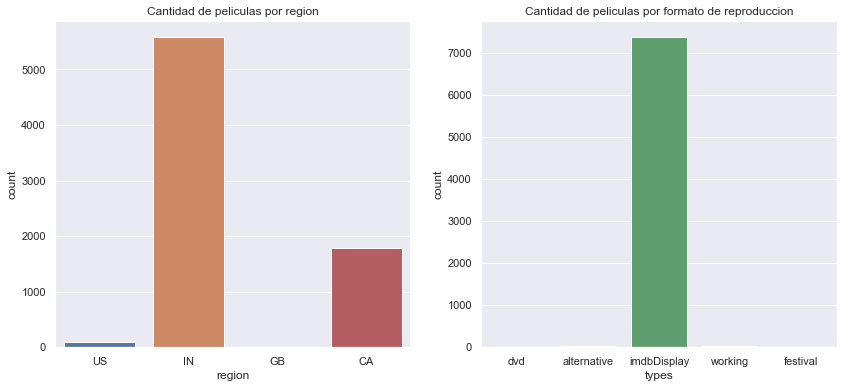

In [369]:
#fig, axs = plt.subplots(1, 2)
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
g1 = sns.countplot(x='region', data=df, ax=my_grid[0]) #.plot(ax = axs[0])
g2 = sns.countplot(x='types', data=df, ax=my_grid[1]) #.plot(ax= axs[1])
g1.set_title('Cantidad de peliculas por region')
g2.set_title('Cantidad de peliculas por formato de reproduccion')
plt.show()


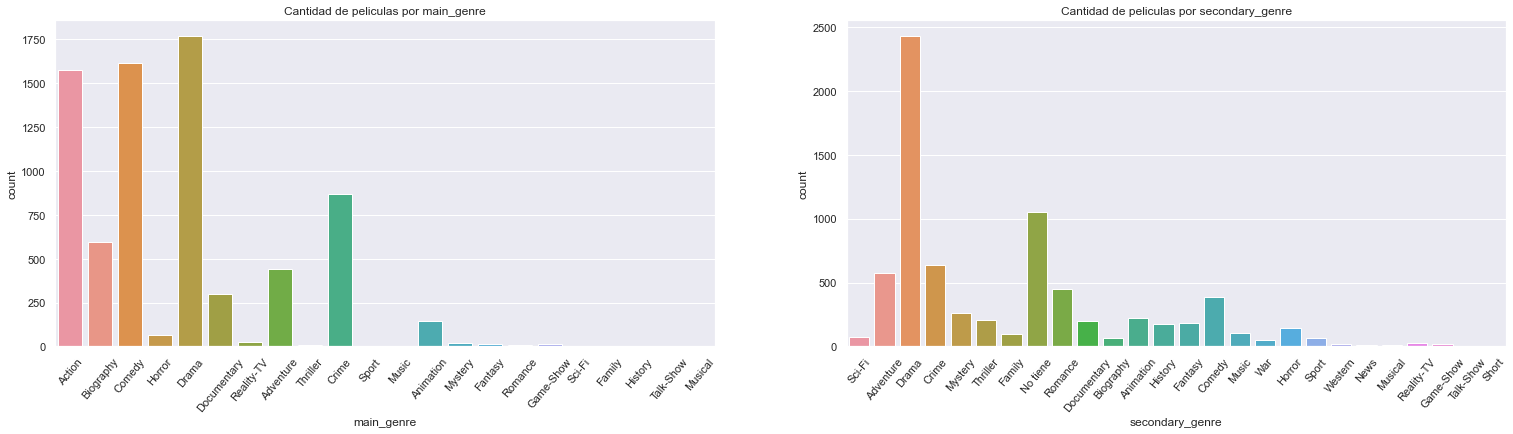

In [370]:
fig, my_grid = plt.subplots(nrows=1, ncols=2, figsize=(26,6))
g1 = sns.countplot(x='main_genre', data=df, ax=my_grid[0]) #.plot(ax = axs[0])
g2 = sns.countplot(x='secondary_genre', data=df, ax=my_grid[1]) #.plot(ax= axs[1])
g1.set_title('Cantidad de peliculas por main_genre')
g2.set_title('Cantidad de peliculas por secondary_genre')
g1.set_xticklabels(g1.get_xticklabels(), rotation=50)
g2.set_xticklabels(g2.get_xticklabels(), rotation=50)
plt.show()

<AxesSubplot:title={'center':'Cantidad de peliculas por puntuación divida en sus regiones'}, xlabel='averageRating'>

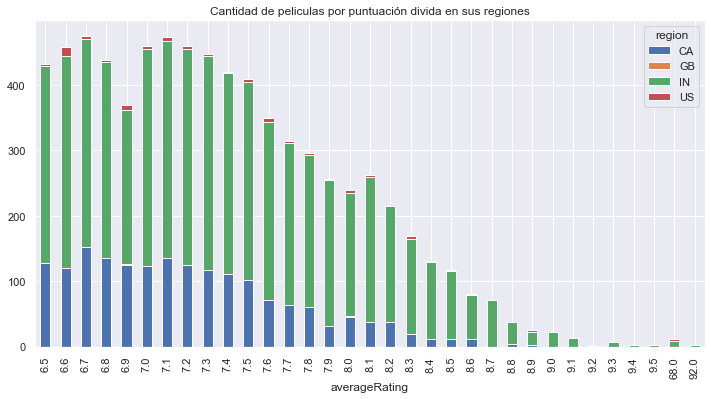

In [371]:
title_gra = 'Cantidad de peliculas por puntuación divida en sus regiones'
df.groupby(['averageRating', 'region']).size().unstack().plot(kind='bar', stacked=True, title=title_gra, figsize=(12, 6))

A continuación veremos graficamente las relaciones que tienen las diferentes variables entre si, más que todo las númericas pero también mostraremos la relación que tienen las númericas con una categorica en especifico que es main_genre ya que consideramos que esta dará insights importantes para el análisis. Además para las generar estas gráficas se hizo una copia del df original con el motivo de solo usar las columnas que queriamos y adicionalmente limpiar un outlier que cambiaba drasticamente los datos. Este error era que algunos ratings tenian valor mayores a 10 lo cual no es correcto y por lo tanto lo arreglamos dividiendo estos valores entre 10.

In [372]:
cols_rela = ["main_genre", "runtimeMinutes", "averageRating", "startYear", "numVotes"] #, "averageRating"]
df_relacion = df[cols_rela].copy()
df_relacion.loc[df["averageRating"] >= 10, "averageRating"] = df["averageRating"]/10
df_relacion

,main_genre,runtimeMinutes,averageRating,startYear,numVotes
0,Action,137,8.6,1991.0,1128166.0
1,Action,22,6.6,2000.0,577.0
2,Biography,150,8.5,2002.0,860569.0
3,Action,120,7.5,2004.0,417391.0
4,Biography,132,6.9,2005.0,5946.0
...,...,...,...,...,...
7466,Drama,108,7.3,2019.0,3779.0
7467,Animation,25,7.5,2019.0,3318.0
7468,Drama,99,7.2,2019.0,3346.0
7469,Drama,84,6.9,2019.0,3646.0


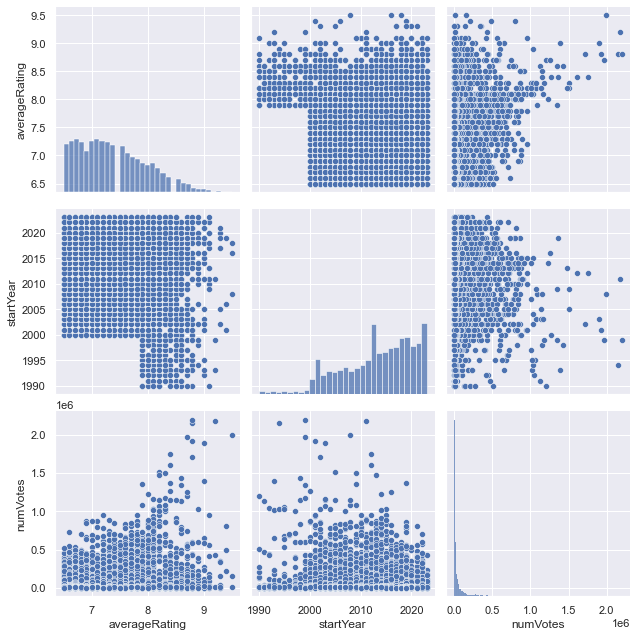

In [373]:
sns.pairplot(df_relacion, height=3,kind='scatter')

c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\juank\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1008x432 with 0 Axes>

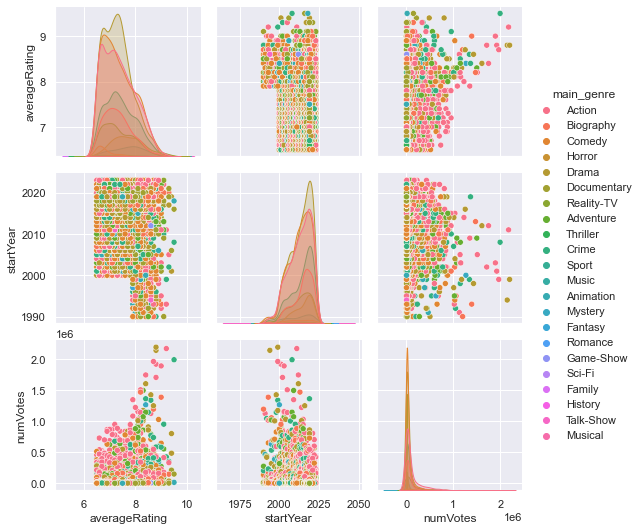

In [374]:
plt.figure(figsize=(14, 6))
sns.pairplot(data=df_relacion, hue="main_genre")
plt.show()

#### Análisis 

1. Observamos que la distribución del número de votos (numVotes) es muy desproporcional, teniendo una distribución estandar de 1.640233e+05, esto es algo que tenemos que tener en cuenta a la hora de realizar el modelo ya que deberiamos eliminar outliers

2. En el averageRating vemos que hay datos que se tendran que corregir / limpiar a la hora de preparar los datos para construir el modelo. El principal error es que hay datos los cuales no pertencen al conjunto dado en el diccionario el cual es (0 a 10), es por esto que los datos que sean mayores a 10 tendran que ser transformados. Una opción sería divir el valor entre 10, ya que si es 92 quedaría como 9.2 el cual es un valor permitido

3. Hay regiones como GB o US las cuales tienen muy pocos datos comparados con IN, esto se debe tener presente a la hora de construir el modelo

4. Hay datos que deberían ser númericos pero son categoricos y datos que son categoricos pero deberían ser númeriocos, esto ser va a corregir antes de crear el modelo 

### 1.2 Análisis de calidad de datos


Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.

### 1.2.1 Completitud

In [375]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

numVotes           0.000134
ordering           0.000134
main_genre         0.000134
isOriginalTitle    0.000134
attributes         0.000134
types              0.000134
language           0.000134
region             0.000134
secondary_genre    0.000134
averageRating      0.000134
runtimeMinutes     0.000134
startYear          0.000134
isAdult            0.000134
index              0.000000
originalTitle      0.000000
titleType          0.000000
tconst             0.000000
#                  0.000000
dtype: float64

A priory se ve que hay un bajo porcentaje de valores nulos, pero hay varias columnas que no aparecen en el diccionario que se nos dio y que carecen de valor para realizar el analisis por lo cual podrían ser removidas. Estas columnas son `#`, `index`, `ordering` y `isOriginalTitle`

### 1.2.2 Unicidad

In [376]:
# Se muestran algunos registros de canciones aparentemente repetidos
# Los repetidos se pueden analizar por la totalidad de sus valores o como en este caso por un subconjunto de estos
df.loc[df.duplicated(subset = df.columns[1:], keep = False)].sort_values(by = 'originalTitle').head(10)

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
6036,6403,8429,tt0395843,tvSeries,CSI: NY,0.0,2004.0,43,6.9,48364.0,31.0,CA,en,imdbDisplay,\N,0.0,Action,Crime
6037,6403,8429,tt0395843,tvSeries,CSI: NY,0.0,2004.0,43,6.9,48364.0,31.0,CA,en,imdbDisplay,\N,0.0,Action,Crime
12,88,299,tt12443930,MOVIE,"Les choses qu'on dit, les choses qu'on fait",0.0,2020.0,122,6.9,2689.0,39.0,US,en,imdbDisplay,\N,0.0,Comedy,Drama
5928,88,299,tt12443930,MOVIE,"Les choses qu'on dit, les choses qu'on fait",0.0,2020.0,122,6.9,2689.0,39.0,US,en,imdbDisplay,\N,0.0,Comedy,Drama
6034,6402,8424,tt0390538,movie,Tarnation,0.0,2003.0,88,7.1,6645.0,1.0,CA,en,imdbDisplay,\N,0.0,Biography,Documentary
6035,6402,8424,tt0390538,movie,Tarnation,0.0,2003.0,88,7.1,6645.0,1.0,CA,en,imdbDisplay,\N,0.0,Biography,Documentary


In [377]:
print('Total de peliculas repetidas:', df.loc[df.duplicated(subset = df.columns[1:], keep = False)].shape[0])

Total de peliculas repetidas: 6


Como podemos ver es baja la cantidad de duplicados que se obtienen de los datos,pero de igual manera estos datos seran eliminados para poder construir el modelo

### 1.2.3 Consistencia

In [378]:
df.titleType.value_counts()

movie           4673
tvSeries        2340
tvMiniSeries     379
tvMovie           70
MOVIE              5
MOvie              3
Movie              1
Name: titleType, dtype: int64

In [379]:
df.averageRating.unique()

array([ 8.6,  6.6,  8.5,  7.5,  6.9,  7.9, 68. ,  6.8,  8.4,  7.3,  7.7,
        7.1,  7. ,  6.7,  8.9,  8.3,  6.5,  8.1,  9. ,  7.6,  8. ,  7.8,
        7.2,  7.4,  9.1,  8.8,  8.2,  8.7,  9.2,  9.4, 92. ,  9.3,  9.5,
        nan])

En este punto encontramos multiples columnas que ponen en peligro las consistencia:
1. En la columna titleType encontramos que se estan repitiendo las mismas categorias como si fuesen diferentes devido a combinaciones entre minusculas y mayuscalas, esto debera ser limpiado y corregido

2. La columna averageRating tiene valores no permitidos ya que se salen del rango de 1 a 10, esto habra que corregirlo antes de construir el modelo


### 1.2.4 Validez

In [380]:
df.isAdult.value_counts()

0.0    7470
Name: isAdult, dtype: int64

In [381]:
df.types.value_counts()

imdbDisplay    7395
working          38
alternative      24
festival         11
dvd               2
Name: types, dtype: int64

In [382]:
df.region.value_counts()

IN    5590
CA    1782
US      94
GB       4
Name: region, dtype: int64

Las columnas a tener y limpiar para mejorar la validez son las siguientes:

1. En la columna isAdult encontramos que solo esta el dato 0, cuando segun el diccionario también deberían haber peliculas con 1. Al solo haber 0s esta columna no aporta mucho valor

2. En la columna types se muestran los diferentes dispositivos en donde se reproducen las peliculas pero hay que tener cuidado con estos datos ya que imdbDisplay domina superiormente a los otros tipos, por lo tanto hay que tener cuidado para construir el modelo

3. En la columna region pasa lo mismo que con types, hay columnas como GB que en comparación con IN quedan pequeñas y no aporta muchos datos, esto hay que tenerlo en cuenta a la hora de construir el modelo

## 2. Preparación de datos

Es el procedimiento llevado a cabo para transformar los valores actuales de acuerdo con el objetivo de negocio a resolver, las técnicas y algoritmos a utilizar, y la calidad de los datos. Incluye la limpieza de los datos, como el manejo de los datos nulos (missing values) y los valores atípicos (outliers) con la justificación respectiva.

### 2.1 Limpieza y correción de datos

In [383]:
df.titleType = df.titleType.str.lower()
df.titleType.unique()

array(['movie', 'tvseries', 'tvminiseries', 'tvmovie'], dtype=object)

In [384]:
print(df.isAdult.unique(), df.isOriginalTitle.unique(), df.attributes.unique(), df.language.unique())

[ 0. nan] [ 0. nan] ['\\N' nan] ['en' nan]


In [385]:
df = df.drop(['#', 'index', 'isAdult', 'attributes', 'isOriginalTitle', 'language', 'ordering'], axis=1)

In [386]:
df.loc[df["averageRating"] >= 10, "averageRating"] = df["averageRating"]/10

In [387]:
df.averageRating.unique()

array([8.6, 6.6, 8.5, 7.5, 6.9, 7.9, 6.8, 8.4, 7.3, 7.7, 7.1, 7. , 6.7,
       8.9, 8.3, 6.5, 8.1, 9. , 7.6, 8. , 7.8, 7.2, 7.4, 9.1, 8.8, 8.2,
       8.7, 9.2, 9.4, 9.3, 9.5, nan])

Se busca en los registros por nombre de pelicula los valores duplicados.

In [388]:
# Se eliminan los repetidos que se hayan identificado aún cuando la columna id sea diferente
df.drop_duplicates(subset = df.columns[1:], inplace = True)

In [389]:
print('Total de peliculas repetidas:', df.loc[df.duplicated(subset = df.columns[1:], keep = False)].shape[0])

Total de peliculas repetidas: 0


In [390]:
df.dropna(inplace = True)
df.shape

(7467, 11)

In [391]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

tconst             0.0
titleType          0.0
originalTitle      0.0
startYear          0.0
runtimeMinutes     0.0
averageRating      0.0
numVotes           0.0
region             0.0
types              0.0
main_genre         0.0
secondary_genre    0.0
dtype: float64

In [392]:
df.runtimeMinutes.describe()

count     7467
unique     362
top         60
freq       534
Name: runtimeMinutes, dtype: object

In [393]:
df.loc[df["runtimeMinutes"] == "\\N", "runtimeMinutes"] = 0

In [394]:
df['runtimeMinutes'] = df['runtimeMinutes'].astype(float)

In [395]:
df.runtimeMinutes.describe()

count    7467.000000
mean       99.461095
std        65.608260
min         0.000000
25%        60.000000
50%       100.000000
75%       122.000000
max       990.000000
Name: runtimeMinutes, dtype: float64

In [396]:
df.loc[df["runtimeMinutes"] == 0, "runtimeMinutes"] = 99.461095

In [397]:
df.runtimeMinutes.describe()

count    7467.000000
mean      100.766464
std        64.597901
min         3.000000
25%        60.000000
50%       100.000000
75%       122.000000
max       990.000000
Name: runtimeMinutes, dtype: float64

In [398]:
df.sample(5)

,tconst,titleType,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,region,types,main_genre,secondary_genre
6877,tt2402129,tvseries,King & Maxwell,2013.0,60.0,7.1,3814.0,CA,imdbDisplay,Crime,Drama
3990,tt3841424,movie,Under sandet,2015.0,100.0,7.8,43493.0,IN,imdbDisplay,Drama,History
1787,tt11650492,tvseries,Girls5eva,2021.0,30.0,7.2,4692.0,IN,imdbDisplay,Comedy,Music
3493,tt2443340,tvseries,Motive,2013.0,60.0,7.4,5780.0,IN,imdbDisplay,Crime,Drama
6187,tt0484082,tvseries,The Class,2006.0,22.0,7.7,4783.0,CA,imdbDisplay,Comedy,Romance


### 2.2 Preparación de variables a utilizar para construir el modelo

La siguiente gráfica permite ver la relación que tienen las features entre sí, esto nos ayudara a decidir cuales son las features que deseamos incluir a la hora de crear nuestros diferentes modelos

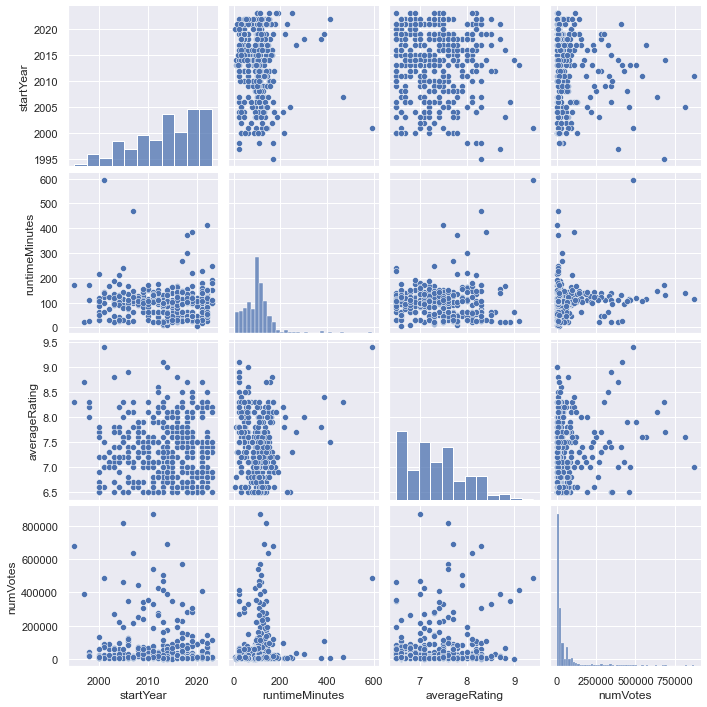

In [399]:
sns.pairplot(df.sample(frac = 0.05))
plt.show()

In [400]:
features = ["runtimeMinutes", "averageRating"]


In [401]:
df_model = df[features].copy()

In [402]:
df_model.duplicated(keep = False).sum()

6268

In [403]:
df_model.drop_duplicates(keep = 'first', inplace = True)

In [404]:
df_model.duplicated(keep = False).sum()

0

In [405]:
df_model.shape

(2490, 2)

In [406]:
df_model.sample(10)

,runtimeMinutes,averageRating
130,127.0,8.2
4592,130.0,8.4
173,93.0,8.1
1074,141.0,7.7
1227,11.0,8.2
815,112.0,6.5
2996,44.0,7.8
2617,47.0,7.6
2802,164.0,6.6
7286,84.0,7.0


In [407]:
df_model.dropna(inplace = True)

In [408]:
scaler = StandardScaler()
X = scaler.fit_transform(df_model[features])

In [409]:
X

array([[ 0.12787596,  1.62617323],
       [-1.09016674, -1.4356978 ],
       [ 0.26556774,  1.47307968],
       ...,
       [ 0.63627639,  0.24833127],
       [-0.20046599,  1.16689258],
       [-0.17928264, -0.36404294]])

In [410]:
X.shape

(2490, 2)

## 3. Modelamiento 
En este paso se lleva a cabo la elección del modelo con el que queremos cumplir nuestra tarea de aprendizaje.
En este caso, deben usar el algoritmo de K-Means y deberán compararlo con otros dos algoritmos de agrupación, como clustering jerárquico, DBScan, HDBScan, Gaussian Mixture.
Tengan en cuenta que, en ambientes profesionales, la elección y justificación del algoritmo y sus hiperparámetros hace parte de su tarea de consultoría.
Se sugiere explorar la generación de grupos que puedan llevar a mejores valores de coeficiente de silueta, al igual que a una mejor descripción de los grupos identificados que aporte a la organización.

### 3.1 K-Means (Implementación - Juan Camilo Colmenares)

In [411]:
model_kmeans = KMeans(n_clusters=3, random_state=0) 

In [412]:
#res_kmeans = model_kmeans.fit(X)
model_kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

<AxesSubplot:>

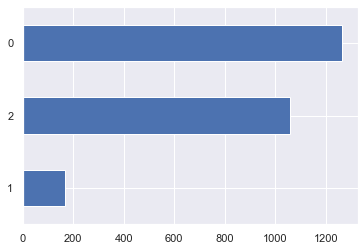

In [413]:
pd.Series(model_kmeans.labels_).value_counts().sort_values().plot.barh()

In [414]:
model_kmeans.labels_

array([2, 0, 2, ..., 2, 2, 0])

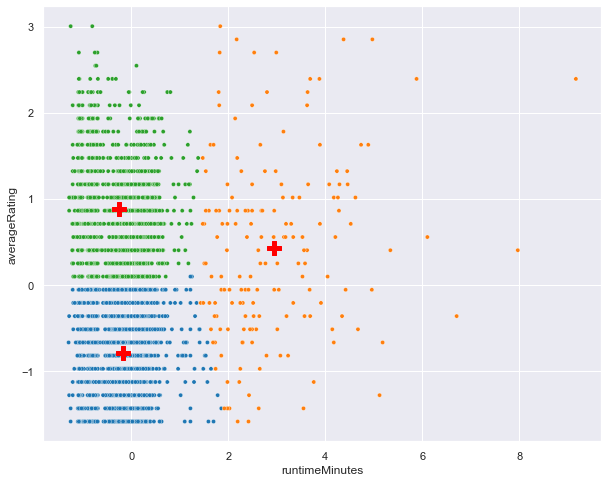

In [415]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = model_kmeans.labels_, palette = 'tab10', size = 1, legend = False)
ax.scatter(x = model_kmeans.cluster_centers_[:,0], y = model_kmeans.cluster_centers_[:,1], c = 'red', s = 200, marker = 'P')
plt.xlabel('runtimeMinutes')
plt.ylabel('averageRating')
plt.show()

### 3.2 K-Medoids (Implementación - Juan Montealegre)


In [416]:
kmedoids = KMedoids(n_clusters=3 ,random_state=0)

In [417]:
X

array([[ 0.12787596,  1.62617323],
       [-1.09016674, -1.4356978 ],
       [ 0.26556774,  1.47307968],
       ...,
       [ 0.63627639,  0.24833127],
       [-0.20046599,  1.16689258],
       [-0.17928264, -0.36404294]])

In [418]:
kmedoids.fit_predict(X) 

array([1, 0, 1, ..., 1, 2, 0], dtype=int64)

<AxesSubplot:>

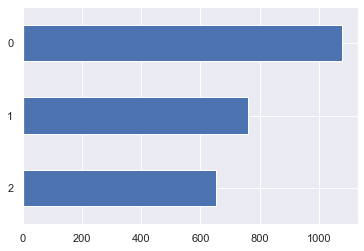

In [419]:
pd.Series(kmedoids.labels_).value_counts().sort_values().plot.barh()

In [420]:
features 

['runtimeMinutes', 'averageRating']

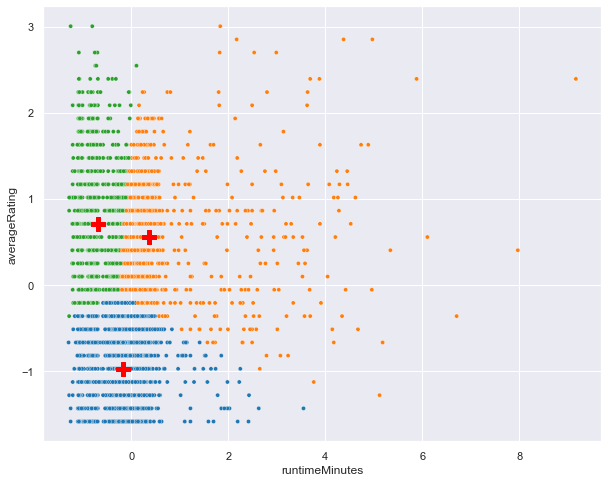

In [421]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.labels_, palette = 'tab10', size = 1, legend = False)
ax.scatter(x = kmedoids.cluster_centers_[:,0], y = kmedoids.cluster_centers_[:,1], c = 'red', s = 200, marker = 'P')
plt.xlabel('runtimeMinutes')
plt.ylabel('averageRating')
plt.show()

### 3.2.1 Agregamos otra feature para los modelos

In [422]:
featuresCompleto = ["averageRating", "runtimeMinutes", "startYear"]

In [423]:
df_model2 = df[featuresCompleto].copy()

In [424]:
df_model2.duplicated(keep = False).sum()
df_model2.drop_duplicates(keep = 'first', inplace = True)
df_model2.duplicated(keep = False).sum()
df_model2.shape

(6532, 3)

In [425]:
df_model2.sample(10)

,averageRating,runtimeMinutes,startYear
1513,7.6,107.0,2008.0
1817,8.9,124.0,2020.0
1019,7.1,106.0,2006.0
4251,6.9,83.0,2017.0
2585,7.9,24.0,2009.0
3904,7.1,21.0,2015.0
2642,8.4,30.0,2010.0
843,6.6,160.0,2004.0
3293,7.9,148.0,2013.0
4874,7.3,112.0,2018.0


In [426]:
df_model2.dropna(inplace = True)

In [427]:
scaler = StandardScaler()
Z = scaler.fit_transform(df_model2[featuresCompleto])

In [428]:
Z

array([[ 1.99888266,  0.49053072, -3.06737279],
       [-1.27326859, -1.2198849 , -1.80524874],
       [ 1.83527509,  0.68388205, -1.52477673],
       ...,
       [ 0.19919947, -1.17526537,  0.85923537],
       [-0.7824459 , -0.29774779,  0.85923537],
       [-0.29162322, -1.20501172,  0.85923537]])

In [429]:
Z.shape

(6532, 3)

In [430]:
kmedoids = KMedoids(n_clusters=4, metric = 'manhattan' ,random_state=0)

In [431]:
df_model2['cluster']=kmedoids.fit_predict(Z)

<AxesSubplot:>

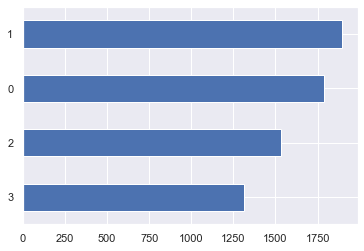

In [432]:
df_model2['cluster'].value_counts().sort_values().plot.barh()

In [433]:
featuresCompleto

['averageRating', 'runtimeMinutes', 'startYear']

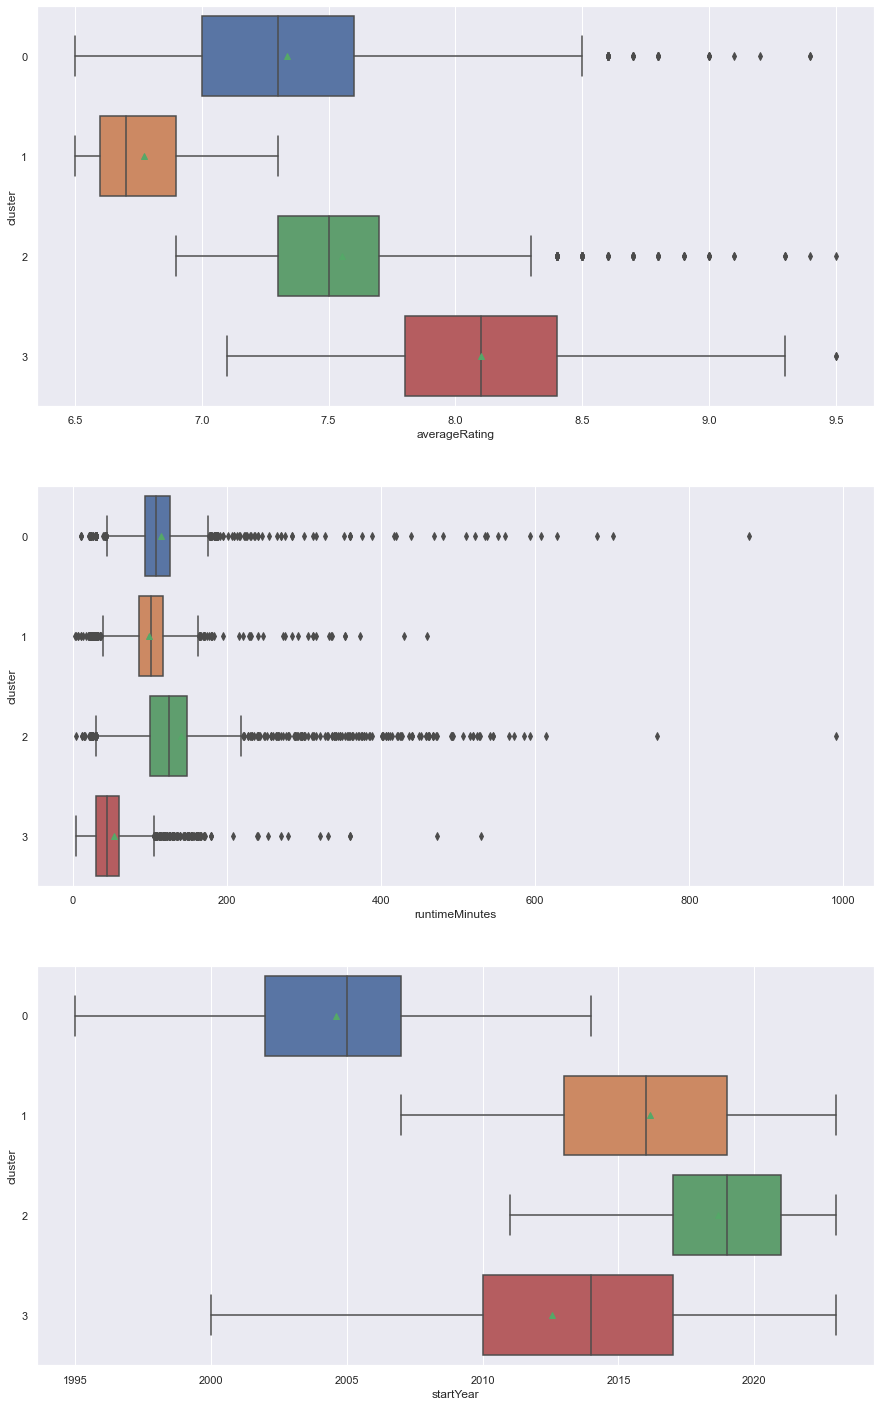

In [434]:
fig, axes = plt.subplots(3, 1, figsize = (15, 25))
sns.boxplot(data = df_model2, x = 'averageRating', y = 'cluster', showmeans = True, orient = 'h', ax = axes[0])
sns.boxplot(data = df_model2, x = 'runtimeMinutes', y = 'cluster', showmeans = True, orient = 'h', ax = axes[1])
sns.boxplot(data = df_model2, x = 'startYear', y = 'cluster', showmeans = True, showfliers= False, orient = 'h', ax = axes[2])

plt.show()

### 3.3 Gaussian Mixture (Implementación - Juan Camilo Colmenares)

In [435]:
gaussioan = GaussianMixture(n_components=3, random_state=6) 

In [436]:
df_model2['cluster']=gaussioan.fit_predict(Z)


<AxesSubplot:>

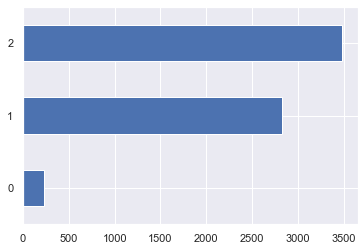

In [437]:
df_model2['cluster'].value_counts().sort_values().plot.barh()

In [438]:

featuresCompleto

['averageRating', 'runtimeMinutes', 'startYear']

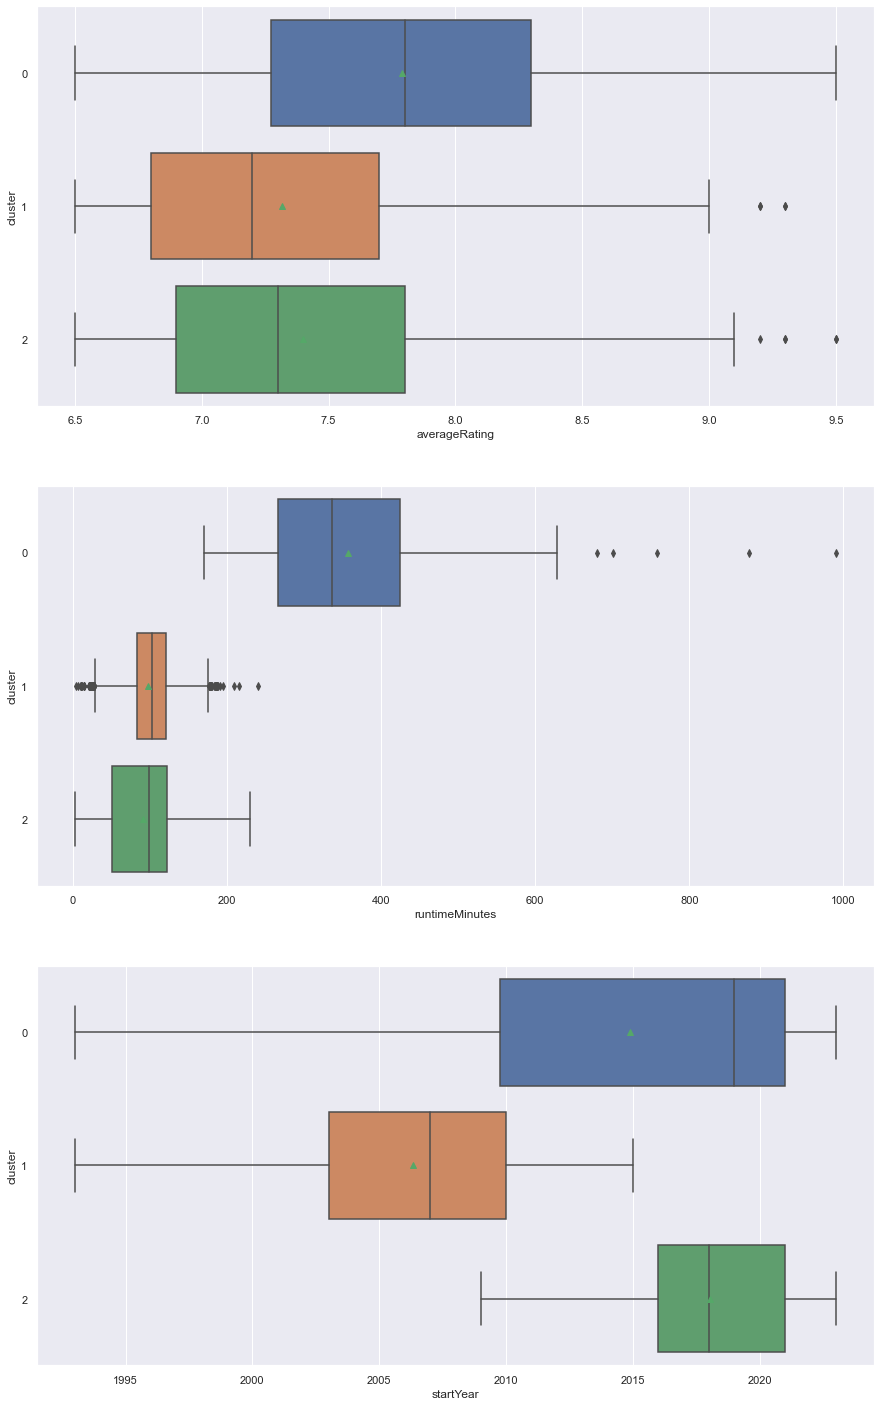

In [439]:
fig, axes = plt.subplots(3, 1, figsize = (15, 25))
sns.boxplot(data = df_model2, x = 'averageRating', y = 'cluster', showmeans = True, orient = 'h', ax = axes[0])
sns.boxplot(data = df_model2, x = 'runtimeMinutes', y = 'cluster', showmeans = True, orient = 'h', ax = axes[1])
sns.boxplot(data = df_model2, x = 'startYear', y = 'cluster', showmeans = True, showfliers= False, orient = 'h', ax = axes[2])
plt.show()

## 4. Validación 
En modelos de aprendizaje no supervisado la validación de los modelos es un reto importante que deben asumir los consultores.

### 4.1 Validación cuantitativa

### 4.1.1 Método del codo

In [440]:
n_clusters = range(2, 31)

In [441]:
kmeans_inertias = []

for n in n_clusters:
    kmeans_ = KMeans(n_clusters = n, random_state = 2)
    kmeans_.fit(X)
    kmeans_inertias.append(kmeans_.inertia_)

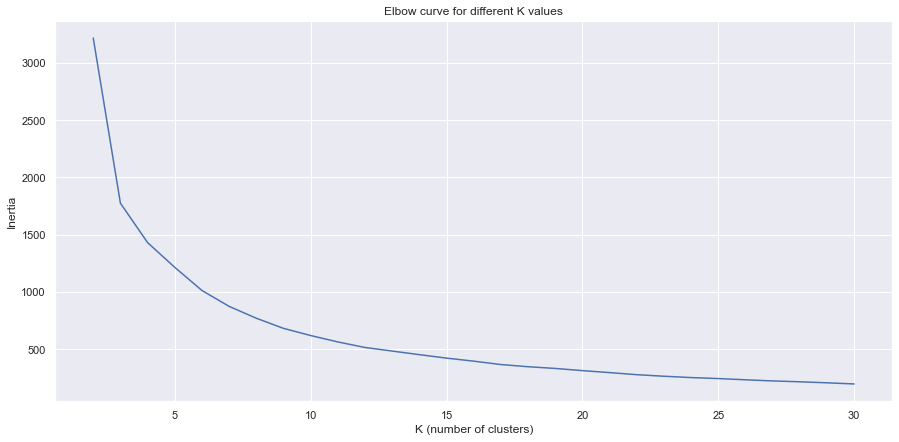

In [442]:
fig = plt.figure(figsize = (15, 7))
plt.plot(n_clusters, kmeans_inertias)
plt.title('Elbow curve for different K values')
plt.xlabel('K (number of clusters)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [443]:
kmedoids_inertias = []

for n in n_clusters:
    kmedoids_ = KMedoids(n_clusters=n, metric = 'manhattan' ,random_state=0)
    kmedoids_.fit(Z)
    kmedoids_inertias.append(kmedoids_.inertia_)


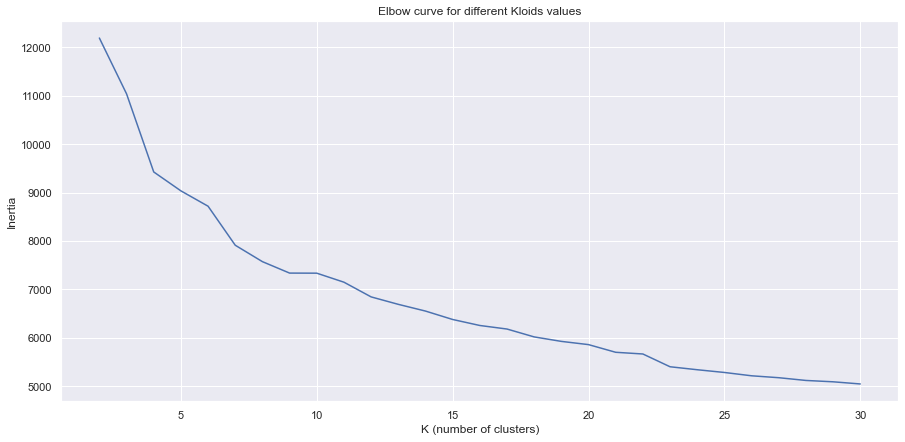

In [444]:
fig = plt.figure(figsize = (15, 7))
plt.plot(n_clusters, kmedoids_inertias)
plt.title('Elbow curve for different Kloids values')
plt.xlabel('K (number of clusters)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### 4.1.2 Método del la silueta


In [484]:
n_clusters = [2, 3, 4, 5, 6]

In [496]:
def plot_silhouette(X, n_clusters, algorithm, random_state = 0):
    for n in n_clusters:
        if algorithm == 0:
            kmeans_ = KMeans(n_clusters = n, random_state = random_state)
            preds_ = kmeans_.fit_predict(X)
            centers = kmeans_.cluster_centers_
        elif algorithm == 1:
            kmedoids_ = KMedoids(n_clusters=n, metric = 'manhattan' ,random_state=0)
            preds_ = kmedoids_.fit_predict(X)
            centers = kmedoids_.cluster_centers_
        elif algorithm == 2:
            gaussiaan_ = GaussianMixture(n_components=n, random_state=6)
            preds_ = gaussiaan_.fit_predict(X) 
            centers = gaussiaan_.cluster_centers_
             

        # Se calcula el coeficiente de silueta general
        silhouette_avg = silhouette_score(X, preds_)
        print('For n_clusters =', n, ', the average silhouette score is :', silhouette_avg )

        # Se calcula el coeficiente de silueta para cada instancia
        sample_silhouette_values = silhouette_samples(X, preds_)

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n + 1) * 10])

        y_lower = 10
        for i in range(n):
            ith_cluster_silhouette_values = sample_silhouette_values[preds_ == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title('The silhouette plot for the various clusters')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Cluster label')
        ax1.axvline(x=silhouette_avg, color = 'red', linestyle = '--')
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(preds_.astype(float) / n)
        ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7, c = colors, edgecolor = 'k')

        # centers = kmeans_.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o', c = 'white', alpha = 1, s = 200, edgecolor = 'k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

        ax2.set_title('The visualization of the clustered data')
        ax2.set_xlabel('Feature space for the 1st feature')
        ax2.set_ylabel('Feature space for the 2nd feature')

        plt.suptitle('Silhouette analysis for clustering on sample data with n_clusters = %d' % n, fontsize = 14, fontweight = 'bold')

    plt.show()

### Validación con silueta para K-means

For n_clusters = 2 , the average silhouette score is : 0.39505284101080773
For n_clusters = 3 , the average silhouette score is : 0.44879995774917275
For n_clusters = 4 , the average silhouette score is : 0.35469314712340116
For n_clusters = 5 , the average silhouette score is : 0.36061212083884137
For n_clusters = 6 , the average silhouette score is : 0.36216078754693093


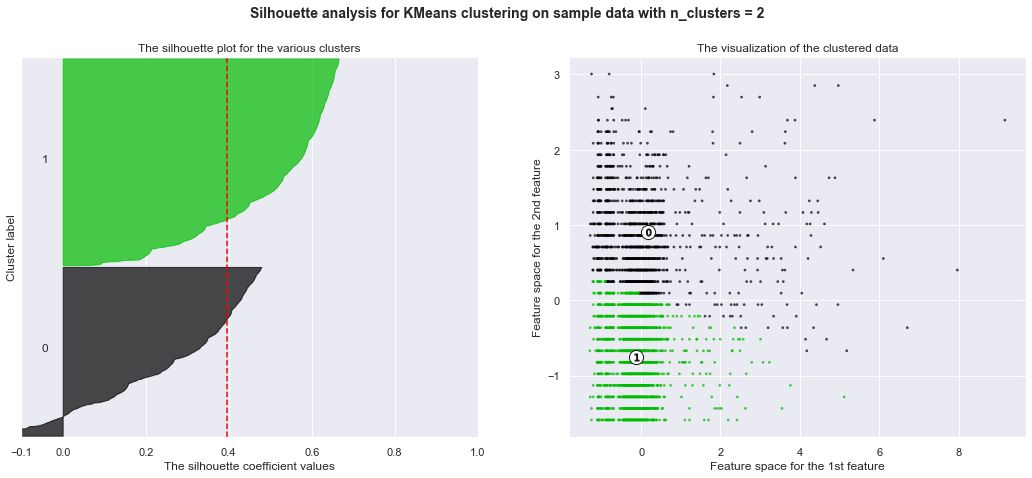

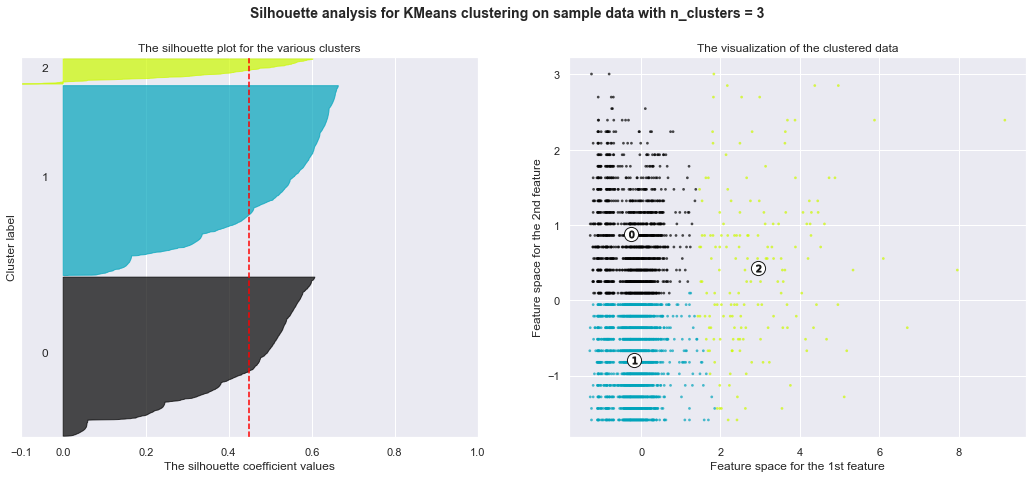

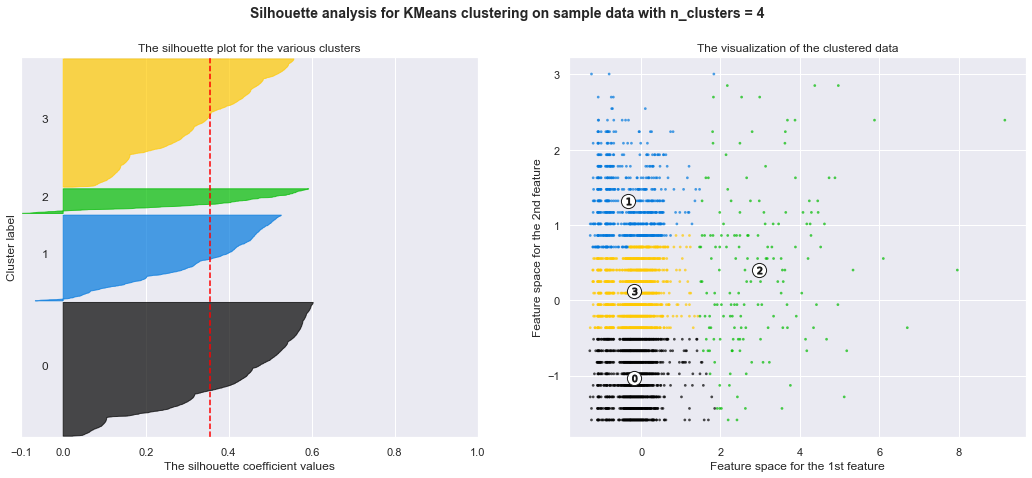

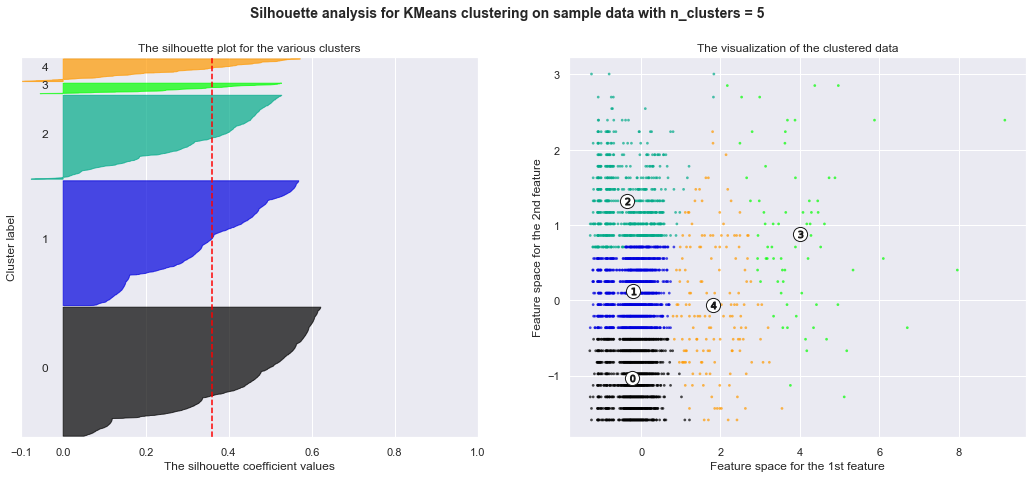

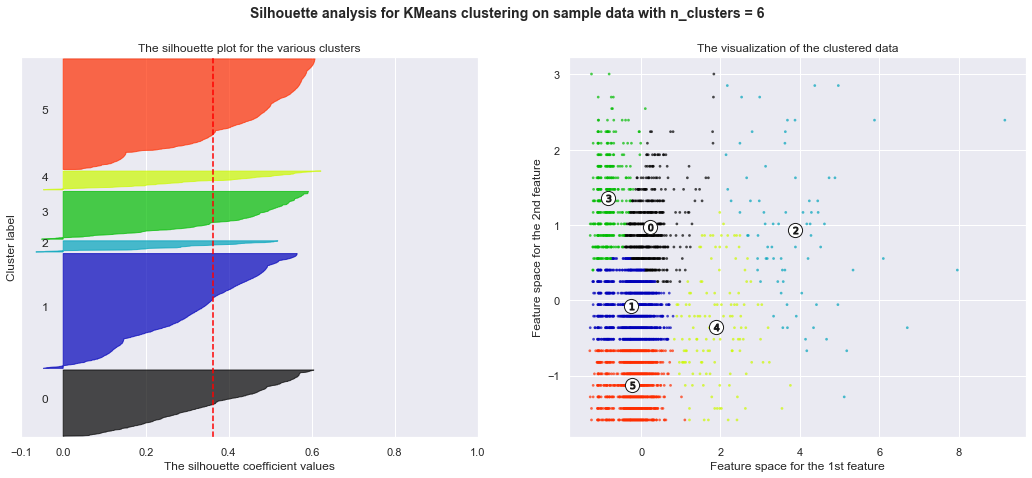

In [492]:
plot_silhouette(X, n_clusters, 0, random_state = 2)

### Validación con silueta para K-medoids

For n_clusters = 2 , the average silhouette score is : 0.28352176342825297
For n_clusters = 3 , the average silhouette score is : 0.2130180672804978
For n_clusters = 4 , the average silhouette score is : 0.2341838510298803
For n_clusters = 5 , the average silhouette score is : 0.19908852425011864
For n_clusters = 6 , the average silhouette score is : 0.17345124813164814


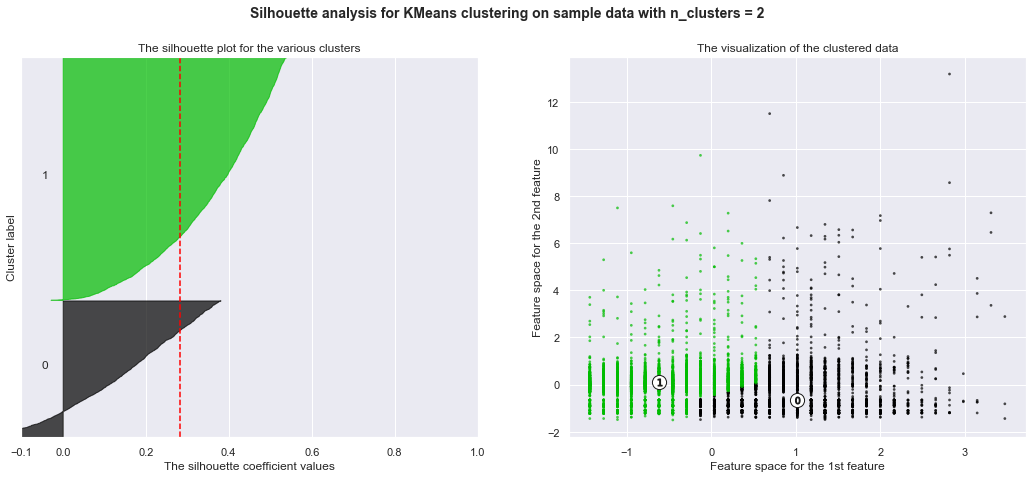

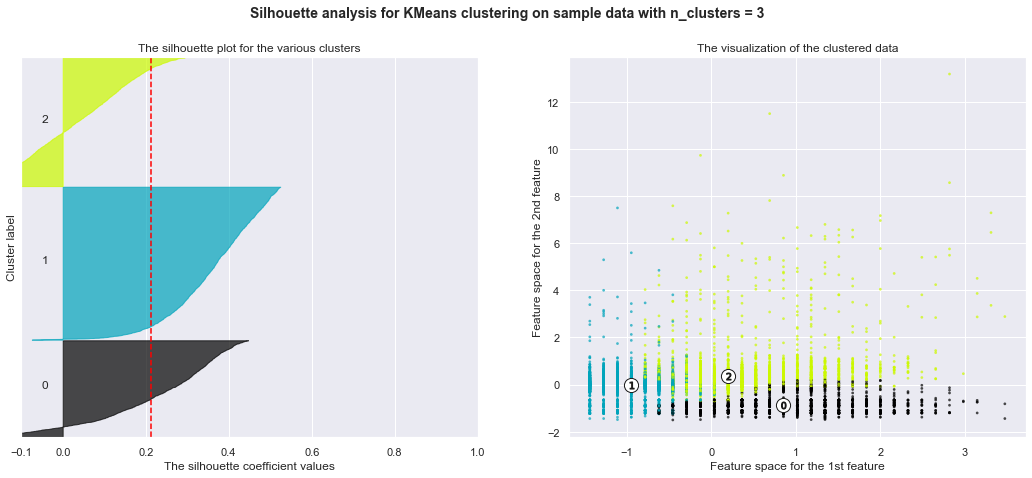

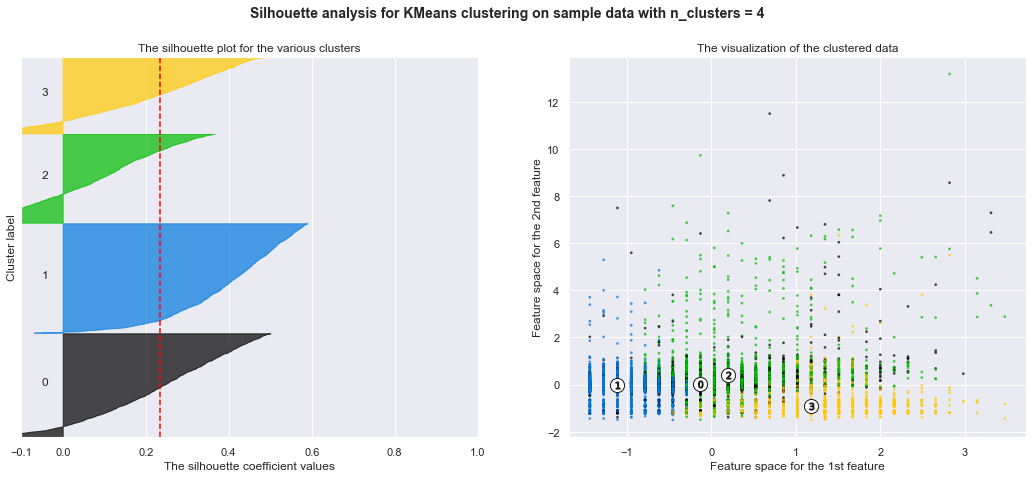

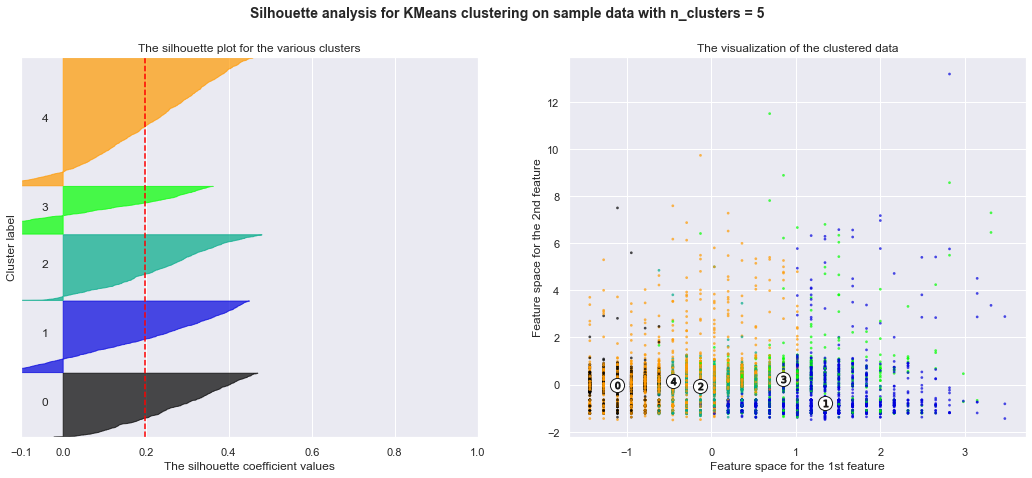

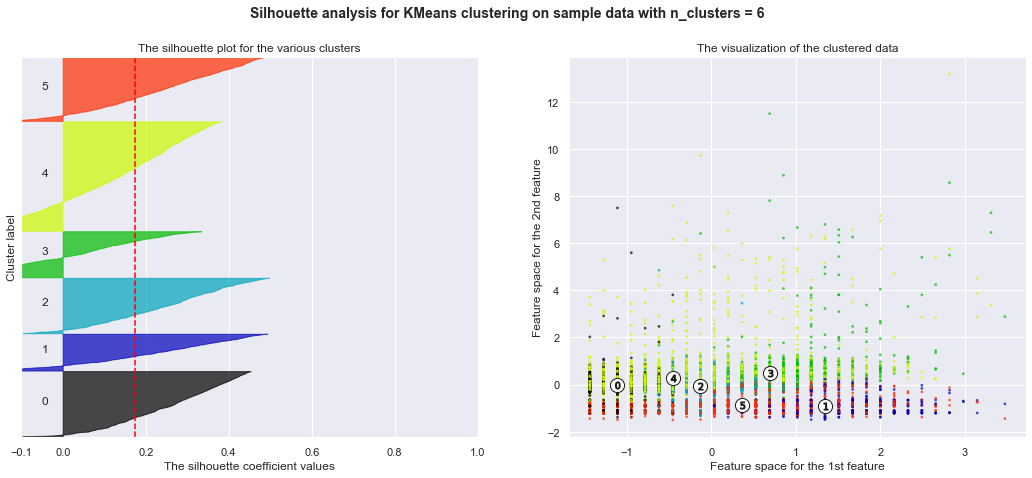

In [495]:
plot_silhouette(Z, n_clusters, 1, random_state = 2)

### Validación con silueta para Gaussian mixture

In [505]:
results = []
for i in range(2,6):
    gaussiaan_ = GaussianMixture(n_components=i, random_state=6)
    preds_ = gaussiaan_.fit_predict(Z)
    score = silhouette_score(Z, preds_)
    results.append(score)    

In [506]:
results

[0.5259607228334156,
 0.27815782111799353,
 0.3102993895517621,
 0.30190000010956797]

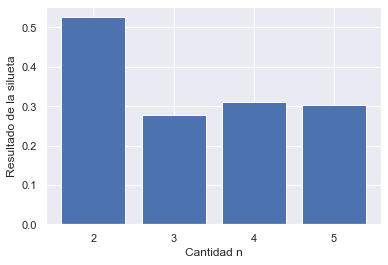

In [511]:
plt.bar(['2','3','4','5'], results)
plt.xlabel("Cantidad n")
plt.ylabel("Resultado de la silueta")
plt.show()

### 4.2 Validación cualitativa


Se encontró haciendo uso del metodo del codo y del metodo de la silueta se encontraron los hiperparametros ideales para obetenr las mejores agrupaciones posibles, fue así que haciendo uso de los diferentes algortimos encontramos que el número de cluster ideal era 3. Las conclusiones que arrojaron los algoritmos para las tres principales features furon las siguientes.

1. Teniendo en cuenta las calificaciones de las peliculas se debe hacer enfásis en las que tengan calificaciones con un rango de 7 a 8

2. Teniendo en cuenta la duración de las peliculas se encontró que hay que hacer enfasisi en aquellas que duran aproximadamente 120 minutos y 300 minutos

3. Por ultimo teniendo en cuenta la fehca de lanzamiento de la pelicula hay que enfocarse en aquellas que fueron lanzadas entre el 2005 y el 2020

Estas concluciones se lograron haciendo uso de los algoritmos explicados anteriormente, y la toma de decición de los hipermarametros se realizó teniendo en cuenta los resultados de validación.